<div class="alert alert-success">
La banque de données pandas wkhrs_df provient de <b>datasets_economics_adult_marriage_database_adultTest</b>. Cette banque de données contient des varibales telles que la workclass, le sexe, le niveau d'éducation, le statut marital, l'occupation professionnelle, l'ethnicité, le nombres d'heures travaillées par semaine et le pays d'origine.</div>

In [208]:
import pandas as pd
from sklearn import preprocessing
from scipy import stats

wkhrs_df = pd.read_csv('datasets_economics_adult_marriage_database_adultTest.csv', sep=None, engine='python', na_values='.')

wkhrs_df['education_lvl'] = ''

#Catégorisation du niveau d'éducation
wkhrs_df.loc[wkhrs_df["education_num"] <= 5, "education_lvl"] = 'low_lvl'
wkhrs_df.loc[(wkhrs_df["education_num"] <= 10) & (wkhrs_df["education_num"] >= 6), "education_lvl"] = 'medium_lvl'
wkhrs_df.loc[(wkhrs_df["education_num"] <= 15) & (wkhrs_df["education_num"] >= 11), "education_lvl"] = 'high_lvl'

le = preprocessing.LabelEncoder()
le.fit(wkhrs_df.sex)
wkhrs_df['sex'] = le.transform(wkhrs_df.sex)

le.fit(wkhrs_df.education_lvl)
wkhrs_df['education_lvl'] = le.transform(wkhrs_df.education_lvl)

#wkhrs_df.education_lvl.isnull().any()
#wkhrs_df.hours_per_week.isnull().any()
#wkhrs_df.sex.isnull().any()
#Il n'y avait aucune donnees manquantes dans ces colonnes.

In [209]:
wkhrs_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'clas', 'education_lvl']

In [210]:
femme_hrs = wkhrs_df[wkhrs_df['sex'] == 0]['hours_per_week']
homme_hrs = wkhrs_df[wkhrs_df['sex'] == 1]['hours_per_week']

stats.ttest_ind(femme_hrs, homme_hrs)

Ttest_indResult(statistic=-29.23334103652233, pvalue=8.92921657722731e-183)

<div class="alert alert-success">
Il y a donc une difference significative entre les hommes et les femmes au niveau du nombre d'heures travaillées par semaine. </div>

In [211]:
high_edu = wkhrs_df[wkhrs_df['education_lvl'] == 0]['hours_per_week']
low_edu = wkhrs_df[wkhrs_df['education_lvl'] == 1]['hours_per_week']
medium_edu = wkhrs_df[wkhrs_df['education_lvl'] == 2]['hours_per_week']

stats.ttest_ind(high_edu, low_edu)

Ttest_indResult(statistic=3.520860157049574, pvalue=0.00043400594467440484)

<div class="alert alert-success">
Il y a donc une difference significative entre les personnes ayant un haut niveau d'éducation et les personnes ayant un faible niveau d'éducation au niveau du nombre d'heures travaillées par semaine. </div>

In [212]:
wkhrs_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,clas,education_lvl
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K.,3
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K.,3
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K.,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,>50K.,3
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,<=50K.,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,1,0,0,40,United-States,<=50K.,1
15056,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,<=50K.,1
15057,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,<=50K.,1
15058,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,<=50K.,1


In [213]:
pd.DataFrame({'Percentage': round(wkhrs_df.groupby(['sex', 'education_lvl']).size() / len(wkhrs_df) * 100, 2)})

Percentage
sex education_lvl            
0   0                    0.18
    1                   10.29
    2                    1.27
    3                   20.88
1   0                    0.94
    1                   21.63
    2                    3.68
    3                   41.12

In [214]:
import statsmodels
from statsmodels.formula.api import ols
model = ols('hours_per_week ~ sex + education_lvl + sex * education_lvl', wkhrs_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     358.7
Date:                Sun, 25 Apr 2021   Prob (F-statistic):          5.23e-225
Time:                        16:40:50   Log-Likelihood:                -58350.
No. Observations:               15060   AIC:                         1.167e+05
Df Residuals:                   15056   BIC:                         1.167e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            41.2536      0.44

<div class="alert alert-success">
Il est donc possible d'observer que la relation entre le niveau d'éducation et le nombre d'heures travaillées par semaine reste inchangé même lorsque le sexe est tenu contrôle. </div>

<ipython-input-215-ed5e5ed76f54>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0.5, 1.0, "Nombre d'heures travaillees selon le genre")]

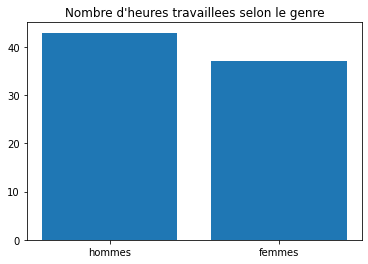

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(['hommes', 'femmes'], [homme_hrs.mean(), femme_hrs.mean()])
ax = plt.axes()
ax.set(title = 'Nombre d\'heures travaillees selon le genre')

<ipython-input-216-0ffd3540fc9e>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


[Text(0.5, 1.0, "Nombre d'heures travaillees selon le niveau d'education")]

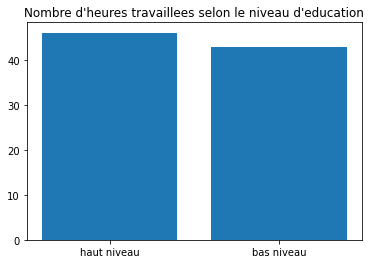

In [216]:
plt.bar(['haut niveau', 'bas niveau'], [high_edu.mean(), low_edu.mean()])
ax = plt.axes()
ax.set(title = 'Nombre d\'heures travaillees selon le niveau d\'education')

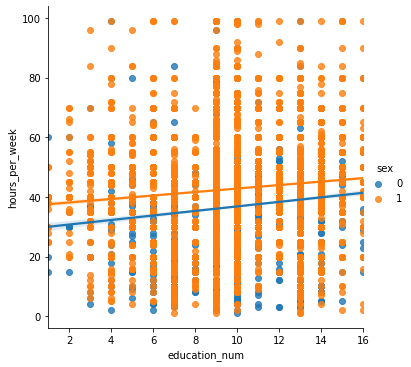

In [217]:
import seaborn as sns
sns.lmplot(y='hours_per_week', x='education_num', hue='sex', data=wkhrs_df)

<div class="alert alert-success">
Grâce aux différents diagrammes, nous pouvons mieux représenter certaines conclusions des analyses. 
    
- Premièrement, il est possible d'observer que les hommes travaillent en  moyenne plus d'heures par semaine que les femmes.
    
- Ensuite, nous pouvons voir que les personnes possédant un plus haut niveau d'éducation, travaillent en moyenne plus d'heures par semaine que les personnes possédant un bas niveau d'éducation.

Étant donné, que les hommes ont tendance à avoir des niveaux d'éducation plus élevés que les femmes, peut-être que cela pourrait donner plus d'explications sur la différence entre les hommes et les femmes au niveau du nombre d'heures travaillées.

- Avec le résultat des analyses et grâce au diagramme, il est possible de voir que la relation se maintien entre le niveau d'éducation et le nombre d'heures travaillées par semaine, même lorsqu'on contrôle pour le sexe. Ce qui laisse penser que la différence entre les hommes et les femmes au niveau du nombre d'heures travaillées par semaine, pourrait être expliquée par une scolarité plus élevée chez les hommes.</div>

# Voyons voir maintenant si d'autres variables pourraient nous aider à prédire le nombre d\'heures travaillées. Pour se faire nos allons utiliser l\'apprentissage machine.

- Commencons avec l'apprentissage supervisé

<div class="alert alert-success">
Nous allons commencer par retirer quelques variables qui semblent non-pertinentes ou qui sont mal définies, afin de mieux comprendre les résultats à la fin. Nous allons retirer <b>fnlwgt, education, education_lvl, capital_gain et capital_loss</b>. On va également retirer <b>hours_per_week</b> et seulement garder une nouvelle variable <b>hours_lvl</b>. Cette nouvelle variable va rendre la tâche de prédiction plus facile.

- On va aussi binariser les données et les standardiser pour améliorer la prédiction.</div>

In [218]:
le.fit(wkhrs_df.workclass)
wkhrs_df['workclass'] = le.transform(wkhrs_df.workclass)

le.fit(wkhrs_df.marital_status)
wkhrs_df['marital_status'] = le.transform(wkhrs_df.marital_status)

le.fit(wkhrs_df.occupation)
wkhrs_df['occupation'] = le.transform(wkhrs_df.occupation)

le.fit(wkhrs_df.relationship)
wkhrs_df['relationship'] = le.transform(wkhrs_df.relationship)

le.fit(wkhrs_df.race)
wkhrs_df['race'] = le.transform(wkhrs_df.race)

le.fit(wkhrs_df.native_country)
wkhrs_df['native_country'] = le.transform(wkhrs_df.native_country)

le.fit(wkhrs_df.clas)
wkhrs_df['clas'] = le.transform(wkhrs_df.clas)

wkhrs_df.loc[(wkhrs_df["hours_per_week"] <= 20) & (wkhrs_df["hours_per_week"] >= 0), "hours_lvl"] = '1'
wkhrs_df.loc[(wkhrs_df["hours_per_week"] <= 40) & (wkhrs_df["hours_per_week"] >= 21), "hours_lvl"] = '2'
wkhrs_df.loc[(wkhrs_df["hours_per_week"] <= 60) & (wkhrs_df["hours_per_week"] >= 41), "hours_lvl"] = '3'
wkhrs_df.loc[(wkhrs_df["hours_per_week"] <= 80) & (wkhrs_df["hours_per_week"] >= 61), "hours_lvl"] = '4'
wkhrs_df.loc[(wkhrs_df["hours_per_week"] <= 100) & (wkhrs_df["hours_per_week"] >= 81), "hours_lvl"] = '5'

wkhrs_df = wkhrs_df.drop('fnlwgt', axis=1)
wkhrs_df = wkhrs_df.drop('education', axis=1)
wkhrs_df = wkhrs_df.drop('capital_loss', axis=1)
wkhrs_df = wkhrs_df.drop('capital_gain', axis=1)
wkhrs_df = wkhrs_df.drop('education_lvl', axis=1)
wkhrs_df = wkhrs_df.drop('hours_per_week', axis=1)

In [220]:
X_data = wkhrs_df.drop('hours_lvl', axis=1)
y_data = wkhrs_df['hours_lvl']

In [231]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import pipeline
from sklearn import decomposition
from sklearn import naive_bayes

std_clf = pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), decomposition.PCA(n_components=5), naive_bayes.GaussianNB())

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_data, y_data,
                                                random_state=1)

std_clf.fit(Xtrain, ytrain)
pred_test_std = std_clf.predict(Xtest)

pca_std = std_clf.named_steps['pca']

scaler = std_clf.named_steps['standardscaler']
Xtrain_std_transformed = pca_std.transform(scaler.transform(Xtrain))

print(f'\nPrediction accuracy for the standardized test:\
      {sklearn.metrics.accuracy_score(ytest, pred_test_std):.2%}')


Prediction accuracy for the standardized test:      62.87%


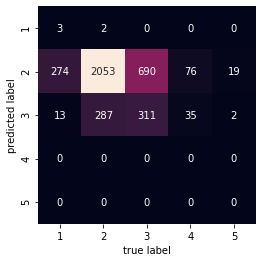

In [271]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

mat = confusion_matrix(ytest, pred_test_std)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels = ['1', '2', '3', '4', '5'])
plt.xlabel('true label')
plt.ylabel('predicted label');

<div class="alert alert-success">
L'apprentissage supervisé se fît relativement bien. La prédiction est satisfaisante avec un <b>62.87%</b> de précision, mais pourrait tout de même être améliorée. Cela est clairement démontré en regardant la matrice de confusion. On peut effectivement voir que l'algorithme réussisait à bien prédire le groupe 2 (ceux travaillant entre 21 et 40 heures par semaine), cependant, il était incapable de prédire le groupe 4 et 5.

- Cela pourrait également être expliqué par le fait que le groupe représentait la majorité des individus (<b>61.53%</b>), suivi du groupe 3 (<b>26.85%</b>; ceux travaillant entre 41 et 60 heures par semaine). Les autres groupes sont sous-représentés, avec des pourcentages en bas de 10%. Peut-être que cela aurait eu un impact sur la précision de la prédiction. </div>

In [239]:
pd.DataFrame({'Percentage': round(wkhrs_df.groupby(['hours_lvl']).size()/len(wkhrs_df)*100, 2)})

,Percentage
hours_lvl,
1,8.06
2,61.53
3,26.85
4,2.90
5,0.67


- Ensuite, voyons voir avec l'apprentissage non-supervisé

In [223]:
# étape 1
from sklearn.decomposition import PCA

# étape 2
model = PCA(n_components=2)

# étape 4
model.fit(X_data)

# étape 5
X_2D = model.transform(X_data)

wkhrs_df['PCA1'] = X_2D[:, 0]
wkhrs_df['PCA2'] = X_2D[:, 1]

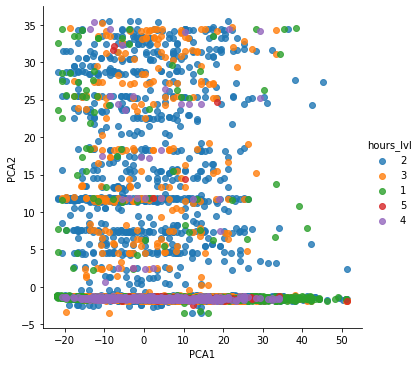

In [224]:
sns.lmplot(x = "PCA1", y = "PCA2", hue='hours_lvl', data=wkhrs_df, fit_reg=False);

In [225]:
# étape 1
#from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture as GMM

# étape 2
model = GMM(n_components=5,
            covariance_type='full')

# étape 4; Remarquez que y n'est pas spécifié!
model.fit(X_data)

# étape 5
y_gmm = model.predict(X_data)

wkhrs_df['cluster'] = y_gmm

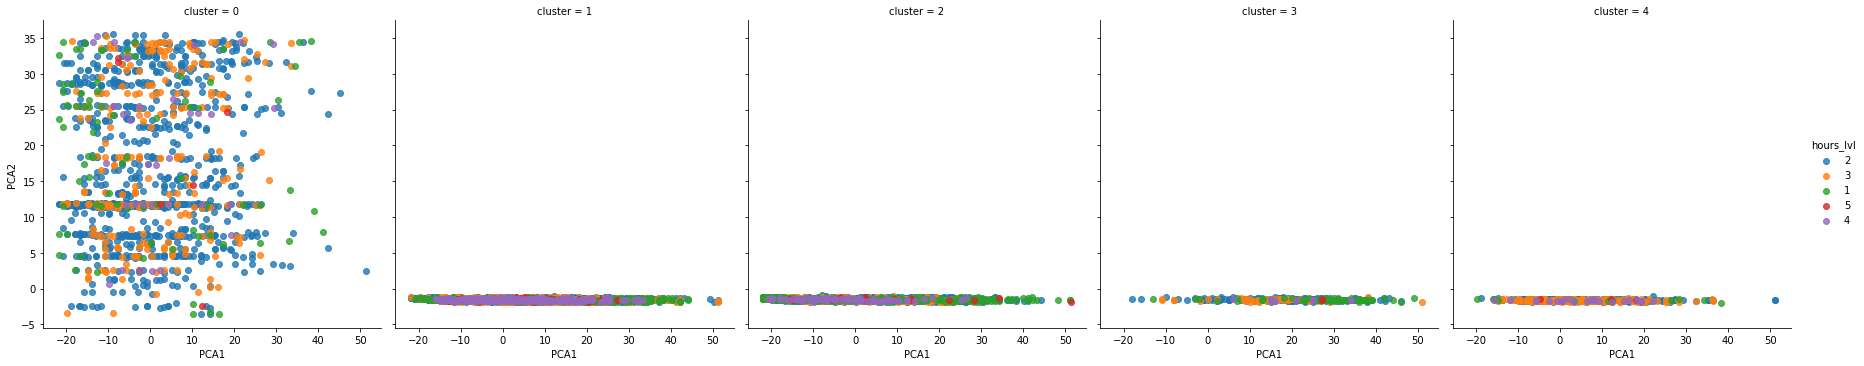

In [226]:
sns.lmplot(x = "PCA1", y = "PCA2", data=wkhrs_df, hue='hours_lvl',col='cluster', fit_reg=False);

In [242]:
sklearn.metrics.accuracy_score(y_data, y_gmm)

0.0

<div class="alert alert-success">
L'apprentissage non-supervisé semble présenté des lacunes. Effectivement, les clusters ne sont pas bien représentés et la précision de la prédiction est dite de 0%. Cela représente un inconvénient majeur étant donné que ça laisse supposer qu'il n'est pas possible de trouver un lagorithme, avec les variables utilisées, pour prédire le nombre d'heures travaillées.

- Cela pourrait être représenté par le fait que d'autres algorithmes seraient mieux adaptés pour cette situation spécifique.</div>

# Conclusion

<div class="alert alert-success">
    <b> Résultats </b>    

Les résultats sont décrits au travers du code. Cependant, en général les résultats restent très intéressants. En effet, le niveau de scolarité semblerait avoir un rôle plus grand lorsqu'il est question de nombre d'heures travaillées par semaine. Le sexe ne serait donc pas une influence. En effet, le fait que les femmes travaillent moins d'heures pourrait être expliqué par le fait qu'elles ont en général une scolarité moins grande. Maintenant, la question qui demeure serait de savoir ce qui cause cette scolarité plus faible et si cette variable explique également le plus petit nombre d'heures travaillées. </div>

<div class="alert alert-success">
    <b> Durée </b>    

Le projet a duré un peu plus longtemps que prévu. Effectivement, il était estimé qu'une dizaine d'heures seraient nécessaires pour la réalisation du projet. Cependant, une quinzaine d'heures ont été requises. L'organisation de la banque de données et les changements nécessaires au cours des analyses ont pris relativement beaucoup de temps. De plus, l'apprentissage non-supervisé fût plus compliqué que prévu.</div>

<div class="alert alert-success">
L'approche est restée relativement similaire à ce qui était prévu initialement. L'expection principale était qu'aucune fonction n'a été créée. En effet, la tâche ne classification n'était pas si complexe et ne demandait pas la création d'une fonction (qui allait être reprise plusieurs fois dans le code). Cette étape n'a donc pas été réalisée.

De plus, il n'était pas prévu initialement de faire des apprentissages machines. Cependant, ceux-ci étaient pertinents à rajouter dans le projet pour explorer la banque de données. </div>

<div class="alert alert-success">
    <b>Hypothèses</b>

- Les hypothèses principales étaient que les hommes allaient travailler plus d'heures par semaine que les femmes. Ce qui fût démontré comme étant vrai. 
- Deuxièmement, il était prévu que les personnes avec un plus niveau de scolarité travailleraient plus d'heures par semaine que les personnes avec un niveau d'éducation plus faible. Encore une fois, les analyses ont démontré que cela était vrai.
- Finalement, il était attendu que la relation entre le niveau d'éducation et le nombre d'heures travaillées par semaine resterait significative, et ce même lorsque le sexe était contrôlé. Les analyses ont une fois de plus confirmé cette hypothèse. </div>

<div class="alert alert-success">
Parmi les difficultés rencontrées, l'apprentissage non-supervisé a représenté le plus gros obstacle. En effet, il était difficile de choisir quel algorithme représentait la meilleure option pour la banque de donnée présente. 

Il fût également compliqué de réorganiser la banque de données durant les différentes étapes du projet. Plusieurs variables devaient être catégorisées différement, pour permettre une meilleure analyse et meilleure interprétation. </div>